In [10]:
from __future__ import absolute_import, division, print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.12.0


In [8]:
# Load dataset
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Train data", train_data.shape, "test_data", test_data.shape)

Train data (25000,) test_data (25000,)


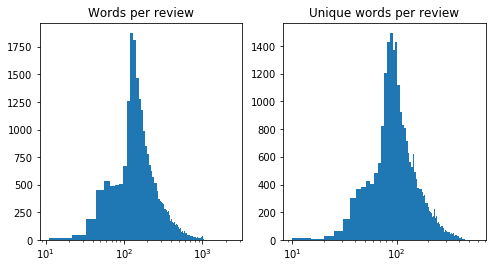

In [16]:
# Statistics on dataset
wordsPerRev = [len(data) for data in train_data]
uniqueWordsPerRev = [len(set(data)) for data in train_data]

fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].hist(wordsPerRev, bins='auto')
ax[0].set_xscale('log')
ax[0].set_title("Words per review")
ax[1].hist(uniqueWordsPerRev, bins='auto')
ax[1].set_title("Unique words per review")
ax[1].set_xscale('log')
plt.show()

In [19]:
# Get original words
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [20]:
# Bring all data to the same shape
# In this case, use padding at the end of the data, and truncate
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [23]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Define model optimization parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Separate training into training and validation
x_val = train_data[:10000]
y_val = train_labels[:10000]
partial_x_train = train_data[10000:]
partial_y_train = train_labels[10000:]

# Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(test_data, test_labels)
print(results)

/opt/anaconda3/envs/dlc_env/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 36us/step - loss: 0.6921 - acc: 0.5208 - val_loss: 0.6905 - val_acc: 0.5200
Epoch 2/40
15000/15000 [==============================] - 0s 23us/step - loss: 0.6870 - acc: 0.6432 - val_loss: 0.6834 - val_acc: 0.7406
Epoch 3/40
15000/15000 [==============================] - 0s 24us/step - loss: 0.6755 - acc: 0.7522 - val_loss: 0.6682 - val_acc: 0.7485
Epoch 4/40
15000/15000 [==============================] - 0s 23us/step - loss: 0.6539 - acc: 0.7619 - val_loss: 0.6439 - val_acc: 0.7586
Epoch 5/40
15000/15000 [==============================] - 0s 24us/step - loss: 0.6217 - acc: 0.7841 - val_loss: 0.6091 - val_acc: 0.7765
Epoch 6/40
15000/15000 [==============================] - 0s 23us/step - loss: 0.5799 - acc: 0.8010 - val_loss: 0.5676 - val_acc: 0.7898
Epoch 7/40
15000/15000 [==============================] - 0s 24us/step - loss: 0.5316 - acc: 0.8211 - val_loss: 0.5231 - val_acc

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

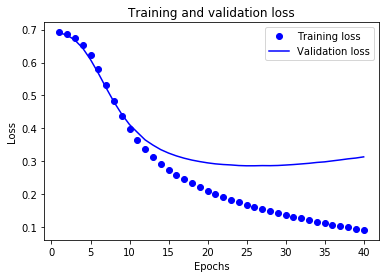

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

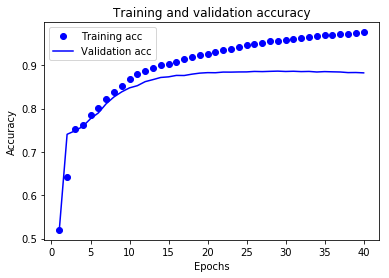

In [27]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
